## PPE predictions

Men's 

In [1]:
import pymc3 as pm
import pandas as pd
import numpy as np


data = pd.read_csv("https://raw.githubusercontent.com/maflancer/ACC-Swimming-Data/master/data%20scraping/swimmers_male_data.csv")
data = data[data['Power_Index'] != 100].reset_index()
teams = list(set(data.Team.unique()))
data['idx'] = data.Team.apply(lambda x: teams.index(x))
y = np.array(data.Total_ppe).reshape((len(data),1))
X = np.zeros((len(y),len(teams)))
for i in range(len(data)):
    X[i,data['idx'][i]] = 1

X = pd.DataFrame(X)
X.columns = [teams[i].replace(" ", "") for i in range(len(teams))]
pi = np.array(data.Power_Index).reshape((len(data),1))
X['Power_Index'] = pi
X['pts'] = y 


with pm.Model() as normal_model:

    sigma = pm.distributions.continuous.HalfCauchy('sigma', beta=10, testval=1.)
    # assume uniformative prior
    intercept = pm.distributions.continuous.Normal('intercept',0, sigma =5)
    power_ind = pm.distributions.continuous.Normal('power_ind', 0, sigma=5)
    # assume every team is average
    x_coeff = [pm.distributions.continuous.Normal(teams[i].replace(" ", ""), 0, sigma=5) for i in range(len(teams))] 

    likelihood = pm.distributions.continuous.Normal('y', mu=intercept +power_ind*X['Power_Index'] + sum([x_coeff[i]*X[teams[i].replace(" ", "")] for i in range(len(teams))]), sigma=sigma, observed=X['pts'])
    men_acc_trace = pm.sample(2000, chains = 5)
    
pm.summary(men_acc_trace)

/Users/kpele/anaconda3/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/Users/kpele/anaconda3/lib/python3.6/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (5 chains in 4 jobs)
NUTS: [GeorgiaInstituteofTechnology, UniversityofMiami(Florida), UniversityofVirginia, NorthCarolinaStateUniversity, UniversityofLouisville, UniversityofNorthCarolina,ChapelHill, VirginiaTech, BostonCollege, FloridaStateUniversity, DukeUniversity, UniversityofPittsburgh, UniversityofNotreDame, power_ind, intercept, sigma]
Sampling 5 chains, 0 div

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
intercept,6.501,1.404,3.700,9.061,0.035,0.025,1626.0,1626.0,1630.0,2174.0,1.0
power_ind,-0.143,0.022,-0.184,-0.101,0.000,0.000,5479.0,5413.0,5477.0,5416.0,1.0
UniversityofNotreDame,0.080,1.518,-2.716,3.039,0.035,0.025,1848.0,1848.0,1850.0,2969.0,1.0
UniversityofPittsburgh,-3.089,1.532,-5.892,-0.152,0.035,0.025,1891.0,1891.0,1893.0,3017.0,1.0
DukeUniversity,-2.671,1.568,-5.604,0.295,0.036,0.025,1944.0,1944.0,1950.0,3222.0,1.0
FloridaStateUniversity,-1.178,1.491,-4.016,1.580,0.035,0.025,1802.0,1802.0,1804.0,2910.0,1.0
BostonCollege,-2.923,1.541,-5.797,0.038,0.035,0.025,1960.0,1960.0,1964.0,3124.0,1.0
VirginiaTech,0.061,1.527,-2.787,2.973,0.035,0.025,1900.0,1900.0,1900.0,2967.0,1.0
"UniversityofNorthCarolina,ChapelHill",-0.725,1.540,-3.635,2.169,0.035,0.025,1899.0,1899.0,1900.0,3177.0,1.0
UniversityofLouisville,0.960,1.546,-1.940,3.925,0.036,0.025,1889.0,1889.0,1889.0,3148.0,1.0


Women's

In [2]:
import pymc3 as pm
import pandas as pd
import numpy as np


data = pd.read_csv("https://raw.githubusercontent.com/maflancer/ACC-Swimming-Data/master/data%20scraping/swimmers_female_data.csv")
data = data[data['Power_Index'] != 100].reset_index()
teams = list(set(data.Team.unique()))
data['idx'] = data.Team.apply(lambda x: teams.index(x))
y = np.array(data.Total_ppe).reshape((len(data),1))
X = np.zeros((len(y),len(teams)))
for i in range(len(data)):
    X[i,data['idx'][i]] = 1

X = pd.DataFrame(X)
X.columns = [teams[i].replace(" ", "") for i in range(len(teams))]
pi = np.array(data.Power_Index).reshape((len(data),1))
X['Power_Index'] = pi
X['pts'] = y 


with pm.Model() as normal_model:

    sigma = pm.distributions.continuous.HalfCauchy('sigma', beta=10, testval=1.)
    # assume uniformative prior
    intercept = pm.distributions.continuous.Normal('intercept',0, sigma =5)
    power_ind = pm.distributions.continuous.Normal('power_ind', 0, sigma=5)
    # assume every team is average
    x_coeff = [pm.distributions.continuous.Normal(teams[i].replace(" ", ""), 0, sigma=5) for i in range(len(teams))] 

    likelihood = pm.distributions.continuous.Normal('y', mu=intercept +power_ind*X['Power_Index'] + sum([x_coeff[i]*X[teams[i].replace(" ", "")] for i in range(len(teams))]), sigma=sigma, observed=X['pts'])
    women_acc_trace = pm.sample(2000, chains = 5)
    
pm.summary(women_acc_trace)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (5 chains in 4 jobs)
NUTS: [GeorgiaInstituteofTechnology, UniversityofMiami(Florida), UniversityofVirginia, NorthCarolinaStateUniversity, UniversityofLouisville, UniversityofNorthCarolina,ChapelHill, VirginiaTech, BostonCollege, FloridaStateUniversity, DukeUniversity, UniversityofPittsburgh, UniversityofNotreDame, power_ind, intercept, sigma]
Sampling 5 chains, 0 divergences: 100%|██████████| 12500/12500 [01:06<00:00, 189.26draws/s]
The acceptance probability does not match the target. It is 0.8983105649248019, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
intercept,5.976,1.404,3.371,8.627,0.038,0.027,1335.0,1335.0,1337.0,2107.0,1.01
power_ind,-0.119,0.018,-0.154,-0.086,0.000,0.000,5963.0,5963.0,5966.0,6381.0,1.00
UniversityofNotreDame,0.272,1.556,-2.635,3.186,0.039,0.027,1632.0,1632.0,1633.0,2687.0,1.00
UniversityofPittsburgh,-1.772,1.526,-4.503,1.204,0.038,0.027,1597.0,1597.0,1599.0,2948.0,1.00
DukeUniversity,-0.455,1.568,-3.409,2.393,0.039,0.027,1637.0,1637.0,1637.0,2966.0,1.00
FloridaStateUniversity,0.207,1.503,-2.579,3.011,0.038,0.027,1553.0,1553.0,1554.0,2688.0,1.00
BostonCollege,-2.093,1.553,-4.937,0.878,0.039,0.027,1615.0,1615.0,1615.0,2598.0,1.00
VirginiaTech,-0.713,1.527,-3.577,2.179,0.039,0.028,1529.0,1529.0,1530.0,2574.0,1.01
"UniversityofNorthCarolina,ChapelHill",3.257,1.570,0.258,6.124,0.039,0.028,1629.0,1629.0,1631.0,2827.0,1.00
UniversityofLouisville,2.307,1.541,-0.581,5.183,0.038,0.027,1631.0,1631.0,1632.0,2579.0,1.00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12f028b00>,
      dtype=object)

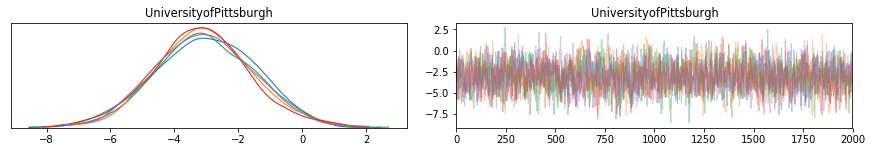

In [3]:
pm.plot_trace(men_acc_trace,var_names=["UniversityofPittsburgh"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12ef85550>,
      dtype=object)

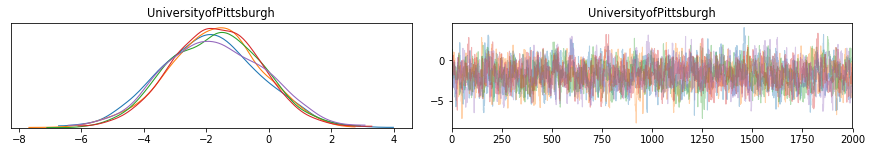

In [4]:
pm.plot_trace(women_acc_trace,var_names=["UniversityofPittsburgh"])

## Tapering 

In [5]:
data = pd.read_csv("/Users/kpele/Downloads/swimmers_male_times.csv")
data = data.dropna(subset=['Improvement']).reset_index()
teams = list(set(data.Team.unique()))
events = list(set(data.Event.unique()))
data['idx'] = data.Team.apply(lambda x: teams.index(x))
data['eidx'] = data.Event.apply(lambda x: events.index(x))
y = np.array(data.Improvement).reshape((len(data),1))
X = np.zeros((len(y),len(teams)))
Xe = np.zeros((len(y),len(events)))
for i in range(len(data)):
    X[i,data['idx'][i]] = 1
    Xe[i,data['eidx'][i]]  = 1

X = pd.DataFrame(X)
X.columns = [teams[i].replace(" ", "") for i in range(len(teams))]
Xe = pd.DataFrame(Xe)
Xe.columns = [events[i].replace(" ", "") for i in range(len(events))]
t = np.array(data.Time).reshape((len(data),1))
X['t'] = t
X['improv'] = y

X = pd.concat([X, Xe], axis=1)


with pm.Model() as normal_model:

    sigma = pm.distributions.continuous.HalfCauchy('sigma', beta=10, testval=1.)
    # assume uniformative prior
    intercept = pm.distributions.continuous.Normal('intercept',0, sigma =5)
    #t = pm.distributions.continuous.Normal('t', 0, sigma=5)
    # assume every team is average
    x_coeff = [pm.distributions.continuous.Normal(teams[i].replace(" ", ""), 0, sigma=5) for i in range(len(teams))] 
    xe_coeff = [pm.distributions.continuous.Normal(events[i].replace(" ", ""), 0, sigma=5) for i in range(len(events))] 
    likelihood = pm.distributions.continuous.Normal('y', mu=intercept + sum([x_coeff[i]*X[teams[i].replace(" ", "")] for i in range(len(teams))]) + sum([xe_coeff[i]*X[events[i].replace(" ", "")] for i in range(len(events))]), sigma=sigma, observed=X['improv'])
    men_acc_trace = pm.sample(2000, chains = 5)
    
pm.summary(men_acc_trace)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (5 chains in 4 jobs)
NUTS: [100YBack, 100YFly, 1650YFree, 200YFly, 400YIM, 500YFree, 200YBreast, 50YFree, 100YFree, 200YFree, 100YBreast, 200YIM, 50YBreast, 50YFly, 50YBack, 200YBack, GeorgiaInstituteofTechnology, UniversityofVirginia, NorthCarolinaStateUniversity, UniversityofLouisville, UniversityofNorthCarolina,ChapelHill, VirginiaTech, BostonCollege, FloridaStateUniversity, DukeUniversity, UniversityofPittsburgh, UniversityofNotreDame, intercept, sigma]
Sampling 5 chains, 0 divergences: 100%|██████████| 12500/12500 [1:29:59<00:00,  2.32draws/s]  
The number of effective samples is smaller than 10% for some parameters.


,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
intercept,1.480,1.823,-2.020,4.888,0.066,0.049,752.0,689.0,742.0,1039.0,1.01
UniversityofNotreDame,0.251,1.411,-2.315,3.068,0.049,0.035,817.0,817.0,818.0,1229.0,1.01
UniversityofPittsburgh,0.070,1.411,-2.536,2.859,0.049,0.035,816.0,816.0,817.0,1234.0,1.01
DukeUniversity,0.255,1.412,-2.355,3.037,0.049,0.035,817.0,817.0,818.0,1228.0,1.01
FloridaStateUniversity,-0.581,1.412,-3.141,2.247,0.049,0.036,816.0,780.0,817.0,1236.0,1.01
BostonCollege,-0.537,1.411,-3.155,2.241,0.049,0.036,819.0,785.0,820.0,1237.0,1.01
VirginiaTech,0.792,1.411,-1.693,3.692,0.049,0.035,816.0,816.0,817.0,1235.0,1.01
"UniversityofNorthCarolina,ChapelHill",0.798,1.411,-1.796,3.580,0.049,0.035,819.0,819.0,820.0,1232.0,1.01
UniversityofLouisville,0.037,1.409,-2.533,2.836,0.049,0.035,814.0,814.0,815.0,1219.0,1.01
NorthCarolinaStateUniversity,0.929,1.412,-1.637,3.750,0.049,0.035,815.0,815.0,816.0,1231.0,1.01


women

In [34]:
data = pd.read_csv("/Users/kpele/Downloads/swimmers_female_times.csv")
data = data.dropna(subset=['Improvement']).reset_index()
teams = list(set(data.Team.unique()))
events = list(set(data.Event.unique()))
data['idx'] = data.Team.apply(lambda x: teams.index(x))
data['eidx'] = data.Event.apply(lambda x: events.index(x))
y = np.array(data.Improvement).reshape((len(data),1))
X = np.zeros((len(y),len(teams)))
Xe = np.zeros((len(y),len(events)))
for i in range(len(data)):
    X[i,data['idx'][i]] = 1
    Xe[i,data['eidx'][i]]  = 1

X = pd.DataFrame(X)
X.columns = [teams[i].replace(" ", "") for i in range(len(teams))]
Xe = pd.DataFrame(Xe)
Xe.columns = [events[i].replace(" ", "") for i in range(len(events))]
t = np.array(data.Time).reshape((len(data),1))
X['t'] = t
X['improv'] = y

X = pd.concat([X, Xe], axis=1)


with pm.Model() as normal_model:

    sigma = pm.distributions.continuous.HalfCauchy('sigma', beta=10, testval=1.)
    # assume uniformative prior
    intercept = pm.distributions.continuous.Normal('intercept',0, sigma =5)
    #t = pm.distributions.continuous.Normal('t', 0, sigma=5)
    # assume every team is average
    x_coeff = [pm.distributions.continuous.Normal(teams[i].replace(" ", ""), 0, sigma=5) for i in range(len(teams))] 
    xe_coeff = [pm.distributions.continuous.Normal(events[i].replace(" ", ""), 0, sigma=5) for i in range(len(events))] 
    likelihood = pm.distributions.continuous.Normal('y', mu=intercept + sum([x_coeff[i]*X[teams[i].replace(" ", "")] for i in range(len(teams))]) + sum([xe_coeff[i]*X[events[i].replace(" ", "")] for i in range(len(events))]), sigma=sigma, observed=X['improv'])
    women_acc_trace = pm.sample(2000, chains = 5)
    
pm.summary(women_acc_trace)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (5 chains in 4 jobs)
NUTS: [100YBack, 100YFly, 1650YFree, 200YFly, 400YIM, 500YFree, 200YBreast, 50YFree, 100YFree, 200YFree, 100YBreast, 200YIM, 50YBack, 200YBack, GeorgiaInstituteofTechnology, UniversityofMiami(Florida), UniversityofVirginia, NorthCarolinaStateUniversity, UniversityofLouisville, UniversityofNorthCarolina,ChapelHill, VirginiaTech, BostonCollege, FloridaStateUniversity, DukeUniversity, UniversityofPittsburgh, UniversityofNotreDame, intercept, sigma]
Sampling 5 chains, 1 divergences: 100%|██████████| 12500/12500 [53:14<00:00,  3.91draws/s] 
The number of effective samples is smaller than 10% for some parameters.


,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
intercept,0.746,1.859,-2.972,4.110,0.080,0.056,546.0,546.0,547.0,619.0,1.01
UniversityofNotreDame,-0.064,1.453,-2.844,2.632,0.065,0.046,494.0,494.0,502.0,599.0,1.01
UniversityofPittsburgh,-0.464,1.454,-3.188,2.283,0.065,0.046,494.0,491.0,503.0,584.0,1.01
DukeUniversity,-0.235,1.453,-2.942,2.520,0.065,0.046,493.0,493.0,502.0,595.0,1.01
FloridaStateUniversity,-0.324,1.452,-3.153,2.314,0.065,0.046,493.0,493.0,502.0,592.0,1.01
BostonCollege,-0.489,1.453,-3.289,2.185,0.065,0.047,493.0,487.0,502.0,554.0,1.01
VirginiaTech,0.252,1.453,-2.507,2.965,0.065,0.046,495.0,495.0,504.0,611.0,1.01
"UniversityofNorthCarolina,ChapelHill",0.261,1.453,-2.496,2.972,0.065,0.046,494.0,494.0,503.0,580.0,1.01
UniversityofLouisville,-0.144,1.453,-2.936,2.532,0.065,0.046,494.0,494.0,502.0,562.0,1.01
NorthCarolinaStateUniversity,0.745,1.453,-1.956,3.507,0.065,0.046,493.0,493.0,502.0,612.0,1.01


In [35]:
# print latex tables 
df1 = pm.summary(men_acc_trace)[['mean','hpd_3%','hpd_97%']]
df2 = pm.summary(women_acc_trace)[['mean','hpd_3%','hpd_97%']]
df = pd.concat([df1,df2],axis = 1).round(2)
with open('mytable.tex','w') as tf:
    tf.write(df.to_latex())

/Users/kpele/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until
